# NLP With Hotel Review Part 2


### By: Roman Kovalchuk

## Table of Contents:
* [Introduction](#Introduction)
* [Importing Data](#Importing)
* [Fitting Logistic Regression](#fitting)
* [Top 20 words most indicative of positive and negative review](#words)
* [Dimensionality Reduction with PCA](#pca)
* [Advantage and Disadvantage of reducing dimensions with PCA](#advantage)
* [K-Nearest Neighbour Classifier](#knearest)
* [Visualizing run time and number of observations](#visualizing)
* [Issue with splitting data into validation sets after vectorization](#issue)
* [Decision Tree Classifier](#tree)
* [Advantages and weaknesses of Decision Trees over KNN](#weakness)
* [Purpose of Validation Set](#purpose)
* [5-fold Cross Validation](#5fold)
* [Creating Confusion Matrix](#confusion)
* [Engineering a new feature](#engineering)
* [Conclusion](#conclusion)

## Introduction<a class="anchor" id="Introduction"></a>

In this project, we will develop several machine learning models to help us correctly label the sentiment behind hotel reviews. The target column is the `rating`, which is denoted as 1 for good ratings and 0 for bad ones.

First, let's import the libraries that we will be using:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Importing Data<a class="anchor" id="Importing"></a>

Now let's import our data which has been split up into Train and Test sets:

In [2]:
hotels_train = pd.read_csv("data/clean_data/clean_train_dataframe.csv")
hotels_test = pd.read_csv("data/clean_data/clean_test_dataframe.csv")

In [3]:
hotels_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hotels_test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#checking the shape of both sets

print(f"The shape of the training data is {hotels_train.shape[0]} rows and {hotels_train.shape[1]} columns")

print(f"The shape of the test data is {hotels_test.shape[0]} rows and {hotels_test.shape[1]} columns")

The shape of the training data is 12798 rows and 2744 columns
The shape of the test data is 4267 rows and 2744 columns


## Splitting data into Train and Test sets<a class="anchor" id="splitting"></a>

Let's separate our dependent and independent variables to our train and test sets. The dependent variable is `rating`, which will be assigned to y and dropped from the X axes.

In [7]:
# splitting dataset into train and test variables. rating is is the dependent variable.
X_train = hotels_train.drop(columns=['rating'])
y_train = hotels_train['rating']
X_test = hotels_test.drop(columns=['rating'])
y_test = hotels_test['rating']

# displaying shape of our 4 split sets
print('The shape of the independent variables in the training set: ', X_train.shape)
print('The shape of the dependent variable in the training set: ', y_train.shape)
print('The shape of the independent variables in the test set: ', X_test.shape)
print('The shape of the dependent variable in the test set: ', y_test.shape)

The shape of the independent variables in the training set:  (12798, 2743)
The shape of the dependent variable in the training set:  (12798,)
The shape of the independent variables in the test set:  (4267, 2743)
The shape of the dependent variable in the test set:  (4267,)


## Fitting Logistic Regression<a class="anchor" id="fitting"></a>

Let's apply our first classifier on this dataset, which will be Logistic Regression but before that, let's scale the data to standardize the distribution and make sure all our values lie in the same range. We will set LogisticRegression's solver to `lbfgs`, which stores only a few vectors and saves memory.

In [8]:
# import scaler and logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
 
# instante the scaler
scaler = StandardScaler()

# fitting scaler
scaler.fit(X_train)
 
# scaling the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# instantiating logistic regression model with solver as "lbfgs"
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
 
# fitting the model
logreg.fit(X_train_scaled, y_train)

# scoring train and test sets
print('Accuracy of the scaled train set: ', logreg.score(X_train_scaled, y_train))
print('Accuracy of the scaled test set: ', logreg.score(X_test_scaled, y_test))

Accuracy of the scaled train set:  0.885841537740272
Accuracy of the scaled test set:  0.7328333723927818


We've achieved an accuracy of 89% on the train set and 73% on the test set which may suggest overfitting. 

## Top 20 words most indicative of Positive and Negative review<a class="anchor" id="words"></a>

Now let's check the top 20 words most indicative of positive and negative reviews. We will create a new DataFrame with our X_train columns and Logistic Regression coefficients, separate the words by positive and negative and then plot them into bar charts. Let's see what words we get:

In [10]:
#creating df
word_counts = pd.DataFrame({'words': X_train.columns, 'coefficients': logreg.coef_[0]}).sort_values("coefficients", ascending=False)

# sorting the values in descending order
#word_counts.sort_values(by='importance', ascending=False, inplace=True)

positive = word_counts[word_counts['words'].str.startswith('p')]
negative = word_counts[word_counts['words'].str.startswith('n')]

# getting the top 20 positive features
top20_positive = positive.head(20)

# getting the top 20 negative features
top20_negative = negative.tail(20)

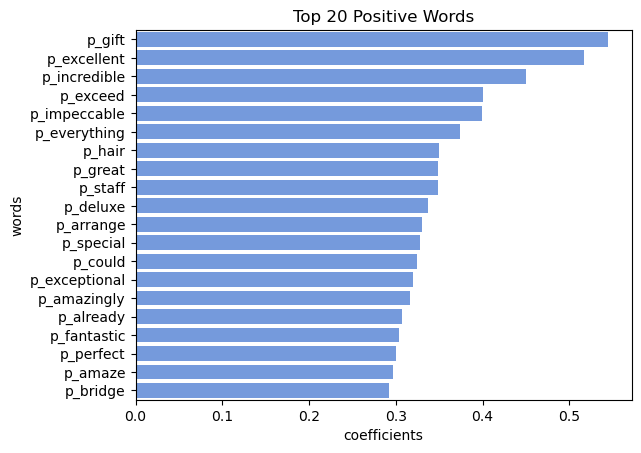

In [11]:
# plotting top 20 positive words 
plt.figure
sns.barplot(x='coefficients', y='words', data=top20_positive, color="cornflowerblue")
plt.title('Top 20 Positive Words')
plt.show()

Some of the top positive words like "gift", "excellent" and "incredible" represent above and beyond customer service experiences which led reviewers to express their gratitude for the fine experience. Let's take a look at the negative words:

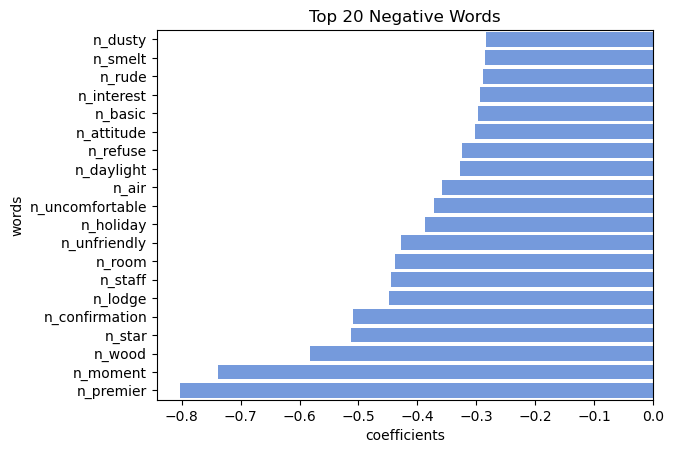

In [12]:
# plotting top 20 negative words
plt.figure
sns.barplot(x='coefficients', y='words', data=top20_negative, color='cornflowerblue')
plt.title('Top 20 Negative Words')
plt.show()

Looking at the negative words, it's strange to see "premier" and "star" on the list though words like "confirmation", "staff", and "room" are more clear, potentially signifying lost confirmations, rude staff, and room's which were not up to standard.

## Dimensionality Reduction with PCA<a class="anchor" id="pca"></a>

Now we will reduce the dimensionality of our data with the PCA transformer object. PCA will capture the important components of our data and reduce the columns in our dataset. We will set `n_components` to 0.9, which will retain 90% of the data and discard 10% of variance. This will ensure that we don't discard too much data that may impact our model's accuracy. Let's go ahead and use PCA below:

In [13]:
# importing PCA
from sklearn.decomposition import PCA

# Create PCA object with 90% of components
my_PCA = PCA(n_components = 0.9)

# fit PCA
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [14]:
print('The shape of the independent variables in the training set: ', X_train.shape)
print(f"The shape of the PCA train set is: {X_train_PCA.shape}")

The shape of the independent variables in the training set:  (12798, 2743)
The shape of the PCA train set is: (12798, 1891)


We see that PCA reduced our columns from 2743 to 1891. Now let's check how long it takes to run a logistic regression with the initial scaled data and then transformed with PCA:

In [15]:
%%timeit 
logreg.fit(X_train_scaled, y_train)

8.21 s ± 344 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
logreg.fit(X_train_PCA, y_train)

4.75 s ± 90.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Reducing the dimensionality has also reduced the run time because there are fewer features included in the model computation. Therefore we can conclude that transforming the data with PCA will reduce the run time for the model.

## Advantage vs Disadvantage of reducing dimensions with PCA<a class="anchor" id="advantage"></a>

As seen above, one advantage of dimensionality reduction is that it can help reduce the computational complexity of our model and therefore reduce the run time. This can be important when working with large data sets with many features, as training machine learning models on high-dimensional data can be computationally expensive.

One disadvantage of dimensionality reduction is that it can result in loss of information. When reducing data, important information can become lost or distorted which can result in decreased accuracy of our model.

## K-Nearest Neighbour Classifier<a class="anchor" id="knearest"></a>

Now we will fit a K-Nearest Neighbour classifier on our data. Since KNN is a distance-based model with features on different scales, we will need normalized data for this model. We will use the scaled data which we obtained earlier with the `StandardScaler()` function.

In [17]:
# importing KNN
from sklearn.neighbors import KNeighborsClassifier

# instantiating KNN
knn = KNeighborsClassifier()
 
# fitting KNN
knn.fit(X_train_scaled, y_train)

# training and test score
print('Accuracy of KNN train score: ', knn.score(X_train_scaled, y_train))
print('Accuracy of KNN test score: ', knn.score(X_test_scaled, y_test))

Accuracy of KNN train score:  0.751211126738553
Accuracy of KNN test score:  0.6367471291305367


Our KNN model gave us a 75% train score and 63% test score which, like our logistic regression, suggests overfitting.

## Visualizing run-time and number of observations<a class="anchor" id="visualizing"></a>

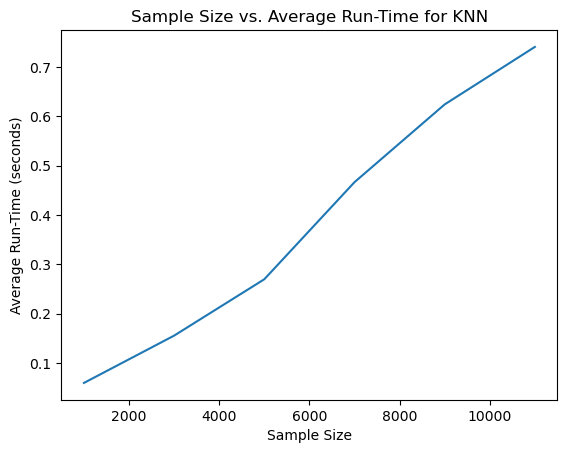

In [18]:
#importing time
import time

# defining number of iterations and sample sizes
num_iterations = 10
sample_sizes_to_test = range(1000, 13000, 2000)

# initializing lists to store the sample sizes and average times
sample_sizes_plot = []
average_times = []

# looping through sample size to run KNN for each iteration
for sample_size in sample_sizes_to_test:
    total_time = 0
    for i in range(num_iterations):
        # Down-sample the training data to the specified sample size
        random_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_train_sampled = X_train.iloc[random_indices]
        y_train_sampled = y_train.iloc[random_indices]

        # Fit the KNN model and measure the time taken
        start_time = time.time()
        knn = KNeighborsClassifier()
        knn.fit(X_train_sampled, y_train_sampled)
        total_time += time.time() - start_time

    # Calculate the average time taken for the current sample size
    avg_time = total_time / num_iterations

    # Append the results to the lists for plotting
    sample_sizes_plot.append(sample_size)
    average_times.append(avg_time)

# Create a line plot of sample size vs. average time
plt.plot(sample_sizes_plot, average_times)
plt.title('Sample Size vs. Average Run-Time for KNN')
plt.xlabel('Sample Size')
plt.ylabel('Average Run-Time (seconds)')
plt.show()

Since KNN is a distanced based model, lower number of observations result in a quicker run time. In the line plot above, we can see that there's almost a linear relationship between observations and average run-time, with the line taking a steeper turn up at the 5000 sample range before continuing to climb in time as we continue to introduce more samples. As seen with PCM, it's clear that less observations results in a faster processing time.

In [19]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# splitting data into train and validation, stratifying to y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=89, stratify=y_train)

# scaling data
scaler = StandardScaler()
scaler.fit(X_train)
 
# transforming the train and validation set
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [20]:
# setting up empty lists for training and validation accuracy
training_accuracy = []
validation_accuracy = []

# range of k values to try
neighbors_settings = range(1, 30, 2)

# looping through the K values on scaled data
for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    
    # recording the generalization accuracy
    validation_accuracy.append(knn.score(X_val_scaled, y_val))


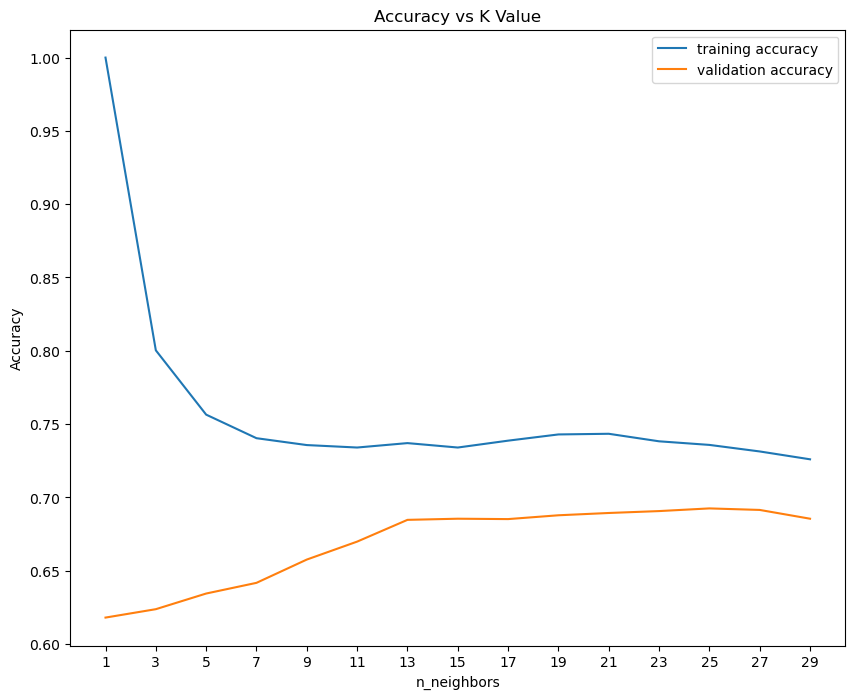

In [21]:
# plotting the training and validation accuracy
plt.figure(figsize=(10, 8)) 
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, validation_accuracy, label='validation accuracy')
plt.title('Accuracy vs K Value')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

Now let's confirm what the optimal `k_value` is for this data and fit it on the model:

In [22]:
# finding best_k
best_k = neighbors_settings[validation_accuracy.index(max(validation_accuracy))]
print('The optimal value for K is: ', best_k)

# instantiating KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)
 
# fitting the model to the train set
knn.fit(X_train_scaled, y_train)
 
# training and test score
print('KNN training score is: ', knn.score(X_train_scaled, y_train))
print('KNN test score is: ', knn.score(X_test_scaled, y_test))

The optimal value for K is:  25
KNN training score is:  0.7357669122572003
KNN test score is:  0.6948675884696508


Our optimal K value of 25 produced a training score of 74% and test score of 69% which is not as good as the Logistic Regression score.

## Issue with splitting data into validation sets after vectorization<a class="anchor" id="issue"></a>

Splitting the data into train and validation sets before vectorizing, as in this case, can lead to data leakage where information from the validation set leaks into the training set, leading to over-optimistic performance estimates. Since we are using information from the validation set to vectorize our data, it means that the model can have an advantage when we test it on the validation set itself. Instead, the validation should be done before vectorization occurs, and stored away for testing purposes in the modelling part.

## Decision Tree Classifier<a class="anchor" id="tree"></a>

Now we can fit a Decision Tree classifier on our data. Since Decision Trees are ensemble methods, they are not that sensitive to variance in the data

In [23]:
# import Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model 
DT = DecisionTreeClassifier()

# Fit the model 
DT.fit(X_train, y_train)

# Scoring
print(f"Accuracy of Decision Tree train score is {DT.score(X_train, y_train)}")
print(f"Accuracy of Decision Tree test score is {DT.score(X_test, y_test)}")

Accuracy of Decision Tree train score is 1.0
Accuracy of Decision Tree test score is 0.6880712444340286


The initial run of the model produced a train score of 100% and a test score of 69%, so the model is clearly overfitting. In this case, the model has memorized the noise of the data and failed to identify the underlying patterns. Let's further split our data into train and validation sets and find the optimal k value by running a loop and appending and plotting the accuracies:

In [24]:
# splitting data into train and validation, stratifying to y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=89, stratify=y_train)

# range of depths to try 
depths = range(1, 21)

# appending to lists
train_acc = []
val_acc = []

# looping through the depths
for max_depth in depths:
    
    # innstantiating the model 
    DT = DecisionTreeClassifier(max_depth=max_depth)
    
    # fitting the model 
    DT.fit(X_train, y_train)
    
    # scoring model 
    train_acc.append(DT.score(X_train, y_train))
    val_acc.append(DT.score(X_val, y_val))

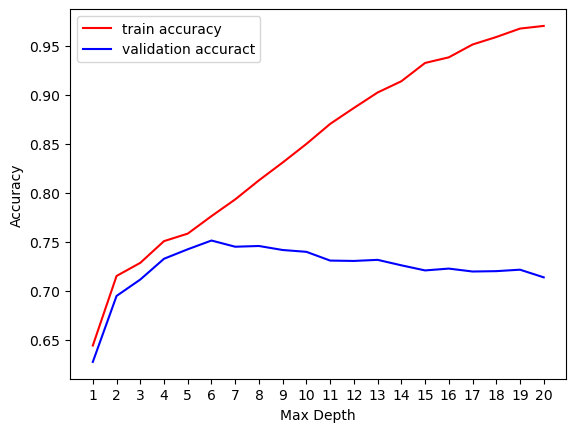

In [58]:
# plotting the accuracies
plt.figure()
plt.plot(depths, train_acc, c='red', label='train accuracy')
plt.plot(depths, val_acc, c='blue', label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(depths)
plt.legend()
plt.show()

In [26]:
# finding best depth
best_depth = depths[val_acc.index(max(val_acc))]
print('The optimal depth value is: ', best_depth)

# Instantiate the model 
DT = DecisionTreeClassifier(max_depth=best_depth)

# Fit the model 
DT.fit(X_train, y_train)

# Score
print(f"Accuracy of Decision Tree train score is {DT.score(X_train, y_train)}")
print(f"Accuracy of Decision Tree test score is {DT.score(X_val, y_val)}")

The optimal depth value is:  6
Accuracy of Decision Tree train score is 0.7763955342902711
Accuracy of Decision Tree test score is 0.7511160714285714


Optimizing our model with the depth of 6 lowered our train score to 78% but raised our test score to 75%. Both scores are now closer together, signifying that there is less overfitting being done. The test score of 75% is higher than both KNN and Logistic Regression.

## Advantages and weaknesses of Decision Trees over KNN<a class="anchor" id="weakness"></a>

There are several advantages and disadvantages when it comes to choosing Decision Trees over KNN.

Decision Trees are easier to interpret and understand than KNN since instances are represented in a tree structure, making it easier to visualize and comprehend. Decision trees are a non-parametric model, which means they do not make assumptions about the data. This can also be helpful in understanding the reasoning behind the classification. Another advantage of Decision Trees is scalability, meaning they are faster to train than KNN since KNN requires computing distances between all pairs of instances, which can become computationally expensive when dealing with large datasets. Decision trees can be trained with an iterative, top-down approach that only considers a subset of features at each step.

One disadvantage of decision trees is that they can be prone to overfitting which occurs when the model fits the training data too closely. This can lead to poor generalization performance on unseen data, making them less accurate than KNN. Another disadvantage is that Decision Tree's can be a bit unstable where small changes in the data or model parameters can lead to significant changes in the resulting decision tree. This can make decision trees less reliable than KNN. 

## Purpose of Validation Set<a class="anchor" id="purpose"></a>

The purpose of the validation set is to evaluate the performance of a machine-learning model during the training phase. Since the machine learning model is trained on a set of training data to learn patterns and relationships between the input data and target variable, it is important to evaluate performance on a separate set of data, the validation set, to ensure that the model is not overfitting to the training data. Overall, the purpose of the validation set is to ensure that the machine-learning model generalizes to new, unseen data and to help improve performance of the model during the training phase.

## 5-Fold cross validation<a class="anchor" id="5fold"></a>

Now we will build a pipeline and re run our Logistic Regression model to optimize for the best hyperparameters. We will test Standard and MinMax Scalers, PCA components of 80 and 90%, various C parameters and L1 and L2 penalties. We will keep the max_iteration at 1000 to reduce run time. We will also perform a 5-fold cross validation with the KFold class which will split our dataset into 5 folds of equal sizes. These folds will be used to train and evaluate different subsets of the data to see how well our model will generalize to new data. Let's get started below:

In [56]:
# importing necessary modules
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


# define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression(max_iter = 1000))
])

# define the grid of hyperparameters to search
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components': [.80, .90],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],

}

# define the cross-validation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
# define the grid search procedure
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=5
)

# fit the grid search
fitted_grid = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 4/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=StandardScaler();, score=nan total time= 1.4min
[CV 5/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=StandardScaler();, score=nan total time= 1.4min
[CV 4/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=MinMaxScaler();, score=nan total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=StandardScaler();, score=nan total time= 1.4min
[CV 1/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=MinMaxScaler();, score=nan total time= 1.4min
[CV 5/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.8, scaler=MinMaxScaler();, score=nan total time= 1.3min
[CV 3/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.9, scaler=StandardScaler();, score=nan total time= 1.4min
[CV 2/5] END model__C=0.01, model__penalty=l1, pca__n_components=0.9, scaler=MinMaxScaler();, score=nan total time= 1.5min
[CV 1/5] END model__C=0.01, model__penalty=l2, pca__n_components=0.8, scaler=StandardScaler();, score=0.760 total time= 1.4min
[CV 5/5] END model__C=0.01, model__penalty=l2, pca__n_components=0.8, scaler=StandardScaler();, score=0.762 total time= 1.5min
[CV 4/5] END model__C=0.01, model__penalty=l2, pca__n_components=0.8, scaler=MinMaxScaler();, score=0.772 total time= 1.7min
[C

[CV 2/5] END model__C=100, model__penalty=l1, pca__n_components=0.8, scaler=StandardScaler();, score=nan total time= 1.5min
[CV 1/5] END model__C=100, model__penalty=l1, pca__n_components=0.8, scaler=MinMaxScaler();, score=nan total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

In [59]:
# print the best score and hyperparameters
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best hyperparameters:", grid_search.best_params_)

Best score: 0.7805
Best hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'pca__n_components': 0.9, 'scaler': StandardScaler()}


Our best model came out with a score of 78.05% and they hyperparameters including:

- C Value: 0.1
- Penalty: L2
- PCA components: 90%
- Scaler: StandardScaler()

Next, let's create a Confusion Matrix from these values

## Creating Confusion Matrix<a class="anchor" id="confusion"></a>

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#re running best hyperparameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('model', LogisticRegression(C=0.1, penalty='l2'))
])

#fitting pipeline
pipeline.fit(X_train, y_train)

#making predictions with fitted pipeline
y_pred = pipeline.predict(X_test)

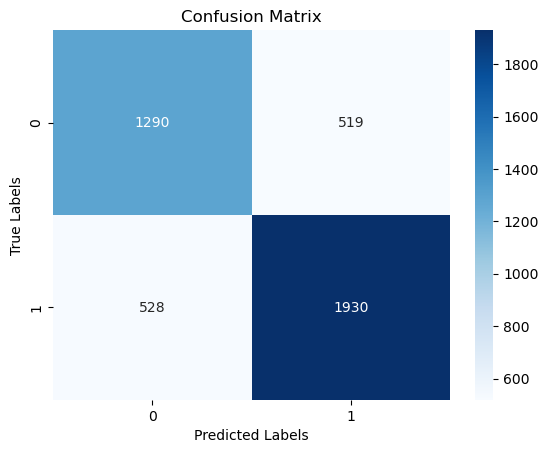

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1809
           1       0.79      0.79      0.79      2458

    accuracy                           0.75      4267
   macro avg       0.75      0.75      0.75      4267
weighted avg       0.75      0.75      0.75      4267



In [71]:
#setting up and displaying confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_test, y_pred))

Our Confusion Matrix can be better interpreted with the following table:

|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| 0| True Negative      | False Positive     |
| 1 | False Negative     | True Positive      |

Our model achieved 75% accuracy, which is better than the initial model of 73%. This means that our model correctly predicted 75% of observations in our test set. However, our precision and recall score is a bit imbalanced with our model predicting 528 false negatives and 519 false positives. Precision measures the percentage of correctly predicted positive instances out of all that were predicted positive, while recall measures the percentage of correctly predicted positive instances out of all actual positives in the dataset. Perhaps we can improve our results by engineering a new feature.

## Engineering a new feature<a class="anchor" id="engineering"></a>

While our dataset contains dates in terms of days, months, and years, it's missing the season that the review was written in. This can be important because travellers use hotels during different seasons and the time of year can have an impact on the sentiment of a review. Categorizing the months into seasons can potentially improve the accuracy of our model. First, let's combine the original train / test dataset to create our new feature.

In [114]:
# combining our train and test data 
hotelsdf = pd.concat([hotels_train, hotels_test], axis=0)

# checking shape
print(f"The shape of our dataset is {hotelsdf.shape[0]} rows and {hotelsdf.shape[1]} columns")

The shape of our dataset is 17065 rows and 2744 columns


Now we can create our new feature called `season` using `month_of_review` column:

In [115]:
# creating season using lambda functions
hotelsdf['season'] = hotelsdf['month_of_review'].apply(lambda x: 'winter' if x in [12, 1, 2] 
                                           else ('spring' if x in [3, 4, 5] 
                                                 else ('summer' if x in [6, 7, 8] 
                                                       else 'fall')))

# checking results
hotelsdf.value_counts('season')

season
winter    4625
spring    4440
summer    4181
fall      3819
dtype: int64

Next, let's create dummy variables by OneHotEncoding the seasons into our DataFrame

In [116]:
# import OHE
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
seasons = pd.DataFrame(hotelsdf['season'])
encoded = ohe.fit_transform(seasons)
encoded


<17065x4 sparse matrix of type '<class 'numpy.float64'>'
	with 17065 stored elements in Compressed Sparse Row format>

In [117]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

[array(['fall', 'spring', 'summer', 'winter'], dtype=object)]

In [118]:
#renaming categories
categories = ['season_fall', 'season_spring', 'season_summer',
        'season_winter']

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
hotelsdf = hotelsdf.reset_index(drop=True)

# concatenate the two dataframes horizontally
hotelsdf = pd.concat([hotelsdf, encoded_df], axis=1)

In [120]:
#dropping unneeded categories
hotelsdf = hotelsdf.drop(columns=['season'])

In [121]:
#checking our DataFrame 
hotelsdf.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_wrong,n_year,n_yes,n_yet,n_young,rating,season_fall,season_spring,season_summer,season_winter
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,1,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,1,1,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,1,0,1,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,1,0,0,0


Now that we've got `seasons` in our DataFrame, let's split our data back into train and test sets. We will use a 75% / 25% split to replicate our previous sets and stratify to the target variable to ensure that both sets have the same proportion of positive and negative reviews.

In [122]:
# setting up our variables. rating is target 
X = hotelsdf.drop('rating', axis=1)
y = hotelsdf['rating']

# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
 
# displaying shape of our 4 split sets
print('The shape of the independent variables in the training set: ', X_train.shape)
print('The shape of the dependent variable in the training set: ', y_train.shape)
print('The shape of the independent variables in the test set: ', X_test.shape)
print('The shape of the dependent variable in the test set: ', y_test.shape)


The shape of the independent variables in the training set:  (12798, 2747)
The shape of the dependent variable in the training set:  (12798,)
The shape of the independent variables in the test set:  (4267, 2747)
The shape of the dependent variable in the test set:  (4267,)


Our variables have been split and we can see 4 extra columns, which signify our seasons. Let's re run the model to see if we get a different result:

In [124]:
#re running best hyperparameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('model', LogisticRegression(C=0.1, penalty='l2', max_iter=1000))
])

#fitting pipeline
pipeline.fit(X_train, y_train)

#making predictions with fitted pipeline
y_pred = pipeline.predict(X_test)

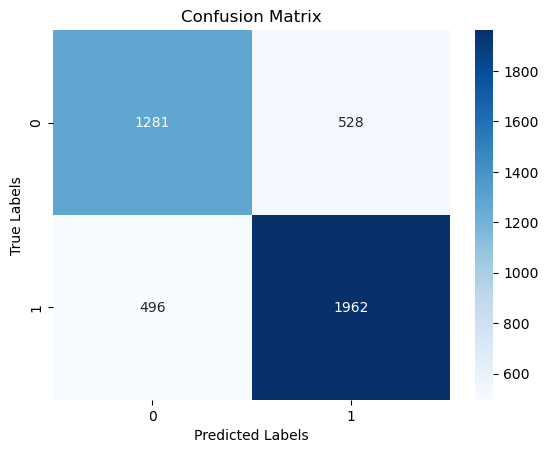

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1809
           1       0.79      0.80      0.79      2458

    accuracy                           0.76      4267
   macro avg       0.75      0.75      0.75      4267
weighted avg       0.76      0.76      0.76      4267



In [125]:
#setting up and displaying confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_test, y_pred))

Our new feature gave us 76% accuracy, which is 1% higher than our previous attempt. It also slightly improved our precision and recall, however there is still an imbalance in our predictions with our model more likely to predict a positive review than a negative one.

## Conclusion<a class="anchor" id="conclusion"></a>

In this project, we ran a Logistic Regression, KNN, and Random Forest machine learning algorithms to attempt to predict the type of sentiment of a hotel review. We started out with basic modelling and ended with creating a pipeline to optimize our hyperparameters and engineered a new feature. We interpreted the results of the model with a confusion matrix, precision, recall, and accuracy scores and our final model ended up classifying 76% of scores correctly. Considering the ratings were in a binary measure, this is a decent result, but it can be further improved by engineering new measures and creating pipelines for other algorithms.